In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv(f'NBA_2024_cleaned.csv')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,24,TOR,6,0,20.0,3.2,7.3,0.432,...,1.000,2.0,4.2,6.2,1.7,0.2,0.5,1.5,2.2,7.5
1,Bam Adebayo,C,26,MIA,10,10,34.7,8.4,16.0,0.525,...,0.803,2.3,8.2,10.5,3.8,1.4,1.4,2.9,2.3,23.0
2,Ochai Agbaji,SG,23,UTA,11,3,17.2,1.7,4.4,0.396,...,0.500,0.8,1.9,2.7,1.0,0.4,0.6,0.6,1.3,4.5
3,Santi Aldama,PF,23,MEM,5,0,21.0,4.6,9.6,0.479,...,0.444,0.6,4.0,4.6,1.8,0.4,0.8,1.6,1.2,11.6
4,Nickeil Alexander-Walker,SG,25,MIN,11,2,19.9,1.9,4.8,0.396,...,0.333,0.1,1.7,1.8,2.4,0.8,0.8,0.9,1.5,5.0


In [4]:
df.isna().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3621 non-null   object 
 1   Pos     3621 non-null   object 
 2   Age     3621 non-null   int64  
 3   Tm      3621 non-null   object 
 4   G       3621 non-null   int64  
 5   GS      3621 non-null   int64  
 6   MP      3621 non-null   float64
 7   FG      3621 non-null   float64
 8   FGA     3621 non-null   float64
 9   FG%     3621 non-null   float64
 10  3P      3621 non-null   float64
 11  3PA     3621 non-null   float64
 12  3P%     3621 non-null   float64
 13  2P      3621 non-null   float64
 14  2PA     3621 non-null   float64
 15  2P%     3621 non-null   float64
 16  eFG%    3621 non-null   float64
 17  FT      3621 non-null   float64
 18  FTA     3621 non-null   float64
 19  FT%     3621 non-null   float64
 20  ORB     3621 non-null   float64
 21  DRB     3621 non-null   float64
 22  

In [5]:
PTS_corr = df.corr(numeric_only=True)['PTS'].sort_values(ascending=False).head(6)
PTS_corr

PTS    1.000000
FG     0.989895
FGA    0.980876
2PA    0.919509
2P     0.909077
FT     0.884021
Name: PTS, dtype: float64

In [6]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:

high_scorers = df[df['PTS'] >= 20]
other_players = df[df['PTS'] < 20]

In [8]:
# Calculate mean values
metrics = ['FGA', '3PA', 'FT', 'AST', 'TRB']
mean_high_scorers = high_scorers[metrics].mean()
mean_other_players = other_players[metrics].mean()
mean_other_players


FGA    6.479956
3PA    2.820107
FT     1.142130
AST    1.904304
TRB    3.315928
dtype: float64

In [9]:
mean_high_scorers

FGA    18.137443
3PA     5.989498
FT      4.792466
AST     5.309817
TRB     6.168493
dtype: float64

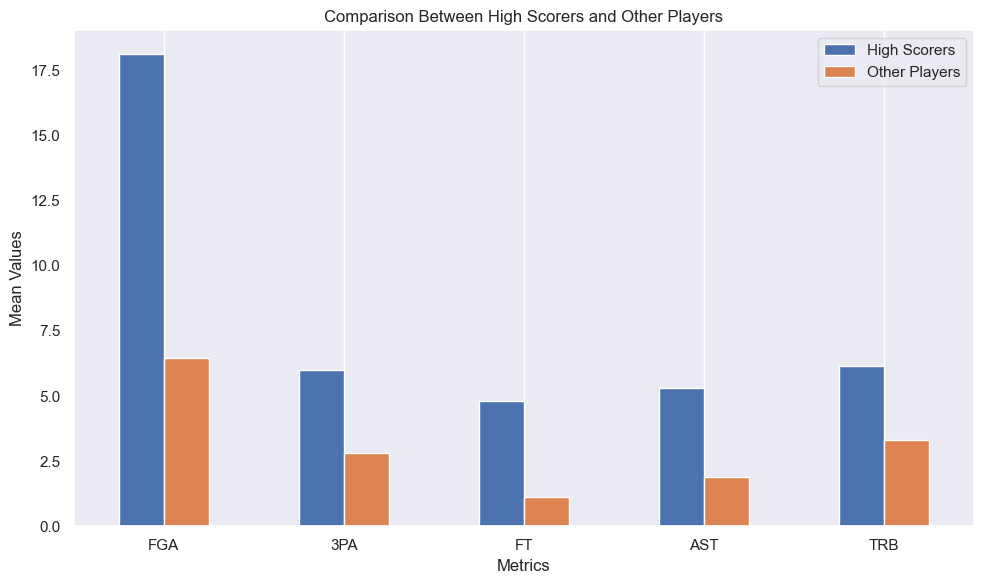

In [10]:

# Create a DataFrame for plotting
mean_values = pd.DataFrame({
    'High Scorers': mean_high_scorers,
    'Other Players': mean_other_players
})

# Plotting
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison Between High Scorers and Other Players')
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()